In [1]:
%reset
import sys, platform, os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pdb
import healpy as hp
from astropy.io import fits
import time
import math
from scipy import interpolate
import pickle as pk
import treecorr
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM
# import astropy.constant as c
sys.path.insert(0,'../')

cosmo_des = FlatLambdaCDM(H0=100, Om0=0.283705720011)
cosmo_pl = FlatLambdaCDM(H0=100, Om0=0.3158)


#see http://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

%matplotlib inline






Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
files_dir = '/global/u1/s/spandey/cosmosis_exp/cosmosis/y3kp-bias-model/3d_stats/bestfits/measurements/'

Pk_terms_names = ['Plin', 'Pmm', 'Pd1d2', 'Pd2d2', 'Pd1s2', 'Pd2s2', 'Ps2s2', 'Pd1d3nl', 'k2Pk']






In [3]:

# settings1 = {'j1':8,'do_regularize_pk':True,'do_reg_all':False,'reg_k':0.3,'reg_c':1000.0,'label': '$\xi_{b_k}$'}
# settings2 = {'j1':1,'do_regularize_pk':True,'do_reg_all':False,'reg_k':0.3,'reg_c':1000.0,'label': '$\xi_{b_1}$'}

settings1 = {'j1':8,'do_regularize_pk':True,'do_reg_all':False,'reg_k':0.3,'reg_c':10.0}
# settings2 = {'j1':8,'do_regularize_pk':True,'do_reg_all':False,'reg_k':0.2,'reg_c':1000.0}
# settings3 = {'j1':1,'do_regularize_pk':True,'do_reg_all':False,'reg_k':0.3,'reg_c':1000.0}
# settings4 = {'j1':2,'do_regularize_pk':True,'do_reg_all':False,'reg_k':0.3,'reg_c':1000.0}

settings_set= [settings1]
labels_set = [r'$\xi^{k_{\ast}=0.3}_{\rm{b_k}}$',r'$\xi^{k_{\ast}=0.2}_{\rm{b_k}}$',r'$\xi_{\rm{mm}}$']
colors_set = ['red','blue','black','orange','green','brown','cyan','yellow','magenta']





In [4]:
r_all,z_all,xi_all = [],[],[]
k_all,z_all,Pk_all = [],[],[]
labels_all = []

for j in range(len(settings_set)):
    settings = settings_set[j]
    j1 = settings['j1']
    do_regularize_pk = settings['do_regularize_pk']
    do_reg_all = settings['do_reg_all']
    reg_k = settings['reg_k']
    reg_c = settings['reg_c']
    label = labels_set[j]
    if do_regularize_pk:
        if do_reg_all:
            xi_f = np.load(
                files_dir + 'xi_oneloop_eul_bk_' + Pk_terms_names[
                    j1] + '_isregpk_' + str(
                    do_reg_all) + '_regk_' + str(reg_k) + '_regc_' + str(reg_c) + '_MICE_cosmo.npz')

            Pk_f = np.load(
                files_dir + 'Pk_oneloop_eul_bk_' + Pk_terms_names[
                    j1] + '_isregpk_' + str(
                    do_reg_all) + '_regk_' + str(reg_k) + '_regc_' + str(reg_c) + '_MICE_cosmo.npz')
        else:
            if j1 == len(Pk_terms_names) - 1:
                xi_f = np.load(
                    files_dir + 'xi_oneloop_eul_bk_' +
                    Pk_terms_names[
                        j1] + '_isregpk_' + str(
                        True) + '_regk_' + str(reg_k) + '_regc_' + str(reg_c) + '_MICE_cosmo.npz')

                Pk_f = np.load(
                   files_dir +  'Pk_oneloop_eul_bk_' +
                    Pk_terms_names[
                        j1] + '_isregpk_' + str(
                        True) + '_regk_' + str(reg_k) + '_regc_' + str(reg_c) + '_MICE_cosmo.npz')
            else:
                xi_f = np.load(
                    files_dir + 'xi_oneloop_eul_bk_' +
                    Pk_terms_names[
                        j1] + '_isregpk_' + str(do_reg_all) + '_MICE_cosmo.npz')

                Pk_f = np.load(
                    files_dir + 'Pk_oneloop_eul_bk_' +
                    Pk_terms_names[
                        j1] + '_isregpk_'+ str(do_reg_all) + '_MICE_cosmo.npz')

    else:
        xi_f = np.load(
            files_dir + 'xi_oneloop_eul_bk_' + Pk_terms_names[
                j1] + '_isregpk_' + str(do_regularize_pk) + '_MICE_cosmo.npz')

        Pk_f = np.load(
            files_dir + 'Pk_oneloop_eul_bk_' + Pk_terms_names[
                j1] + '_isregpk_' + str(do_regularize_pk) + '_MICE_cosmo.npz')

    
    r_all.append( xi_f['r'])
    z_all.append(xi_f['z'])
    xi_all.append(xi_f['xi'])
    k_all.append(Pk_f['k'])
    Pk_all.append(Pk_f['pkz'])
    labels_all.append(label)
    






In [5]:
Pk_all[0].shape


(50, 50000)

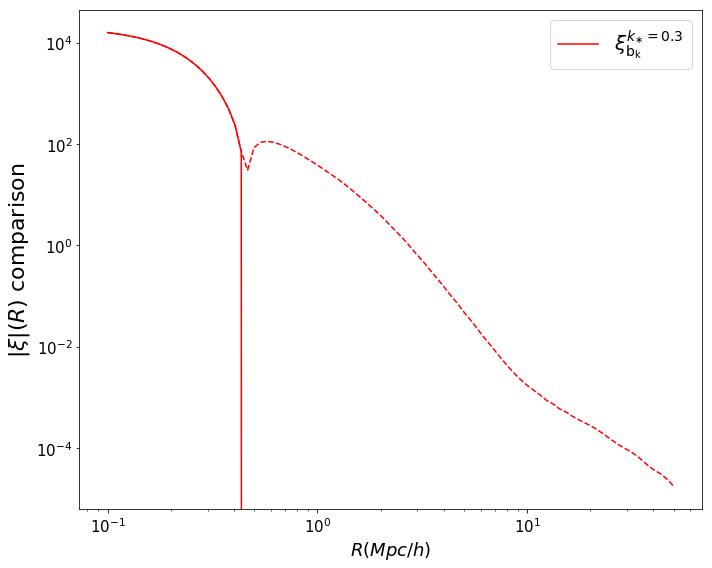

In [6]:
fig, ax = plt.subplots(1,1, figsize = (10,8))

zind = 0
# print('z = ' + str(z1[zind]))

for j in range(len(settings_set)):

    ax.plot(r_all[j],np.abs(xi_all[j][zind]), color = colors_set[j], marker='',linestyle='--')
    ax.plot(r_all[j],(xi_all[j][zind]), color = colors_set[j], marker='',linestyle='-',label=labels_all[j])

ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_ylim(1e-5,50)
ax.set_xlabel(r'$R(Mpc/h)$', size = 18)
ax.set_ylabel(r'$|\xi|(R)$ comparison', size = 22)
ax.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.tight_layout()
# plt.savefig('xi_k2Pk_mm_comp.png')




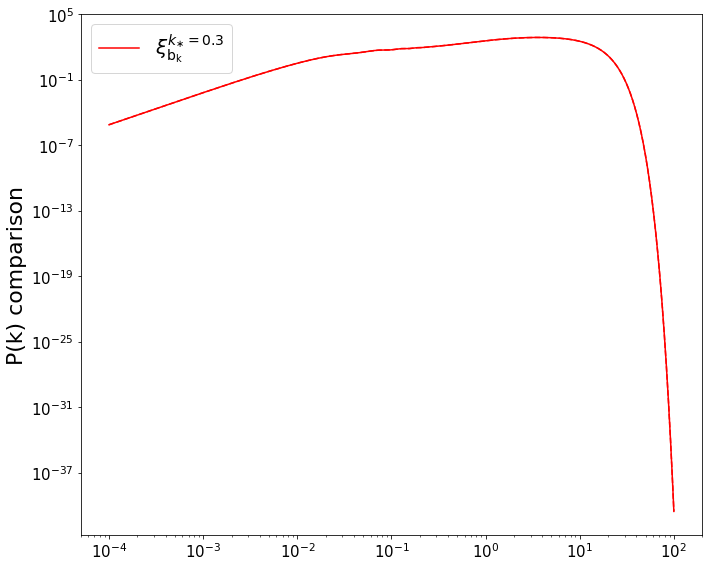

In [7]:
fig, ax = plt.subplots(1,1, figsize = (10,8))

zind = 0

for j in range(len(settings_set)):

    ax.plot(k_all[j],np.abs(Pk_all[j][zind]), color = colors_set[j], marker='',linestyle='--')
    ax.plot(k_all[j],(Pk_all[j][zind]), color = colors_set[j], marker='',linestyle='-',label=labels_all[j])

ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_ylim(1.8,2.0)
# ax.set_xlabel(r'$\theta$', size = 18)
ax.set_ylabel(r'P(k) comparison', size = 22)
ax.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.tight_layout()




In [4]:

# j1 = 1
# do_regularize_pk = True
# do_reg_all = False
# reg_k = 0.4
# reg_c = 1000.


# if do_regularize_pk:
#     if do_reg_all:
#         xi_f = np.load(
#             '/global/u1/s/spandey/cosmosis_exp/cosmosis/y3kp-bias-model/3d_stats/test_res/xi_' + Pk_terms_names[
#                 j1] + '_isregpk_' + str(
#                 do_reg_all) + '_regk_' + str(reg_k) + '_regc_' + str(reg_c) + '_MICE_cosmo.npz')

#         Pk_f = np.load(
#             '/global/u1/s/spandey/cosmosis_exp/cosmosis/y3kp-bias-model/3d_stats/test_res/Pk_' + Pk_terms_names[
#                 j1] + '_isregpk_' + str(
#                 do_reg_all) + '_regk_' + str(reg_k) + '_regc_' + str(reg_c) + '_MICE_cosmo.npz')
#     else:
#         if j1 == len(Pk_terms_names) - 1:
#             xi_f = np.load(
#                 '/global/u1/s/spandey/cosmosis_exp/cosmosis/y3kp-bias-model/3d_stats/test_res/xi_' +
#                 Pk_terms_names[
#                     j1] + '_isregpk_' + str(
#                     True) + '_regk_' + str(reg_k) + '_regc_' + str(reg_c) + '_MICE_cosmo.npz')

#             Pk_f = np.load(
#                 '/global/u1/s/spandey/cosmosis_exp/cosmosis/y3kp-bias-model/3d_stats/test_res/Pk_' +
#                 Pk_terms_names[
#                     j1] + '_isregpk_' + str(
#                     True) + '_regk_' + str(reg_k) + '_regc_' + str(reg_c) + '_MICE_cosmo.npz')
#         else:
#             xi_f = np.load(
#                 '/global/u1/s/spandey/cosmosis_exp/cosmosis/y3kp-bias-model/3d_stats/test_res/xi_' +
#                 Pk_terms_names[
#                     j1] + '_isregpk_' + str(do_reg_all) + '_MICE_cosmo.npz')

#             Pk_f = np.load(
#                 '/global/u1/s/spandey/cosmosis_exp/cosmosis/y3kp-bias-model/3d_stats/test_res/Pk_' +
#                 Pk_terms_names[
#                     j1] + '_isregpk_'+ str(do_reg_all) + '_MICE_cosmo.npz')

# else:
#     xi_f = np.load(
#         '/global/u1/s/spandey/cosmosis_exp/cosmosis/y3kp-bias-model/3d_stats/test_res/xi_' + Pk_terms_names[
#             j1] + '_isregpk_' + str(do_regularize_pk) + '_MICE_cosmo.npz')

#     Pk_f = np.load(
#         '/global/u1/s/spandey/cosmosis_exp/cosmosis/y3kp-bias-model/3d_stats/test_res/Pk_' + Pk_terms_names[
#             j1] + '_isregpk_' + str(do_regularize_pk) + '_MICE_cosmo.npz')


# r2,z2,xi2 = xi_f['r'],xi_f['z'],xi_f['xi']
# k2,z2,Pk2 = Pk_f['k'],Pk_f['z'],Pk_f['pkz']
# label2 = r'$\xi_{b_1}$'



In [66]:

# j1 = 8
# do_regularize_pk = True
# do_reg_all = False
# reg_k = 0.2
# reg_c = 1000.0

# if do_regularize_pk:
#     if do_reg_all:
#         xi_f = np.load(
#             '/global/u1/s/spandey/cosmosis_exp/cosmosis/y3kp-bias-model/3d_stats/test_res/xi_' + Pk_terms_names[
#                 j1] + '_isregpk_' + str(
#                 do_reg_all) + '_regk_' + str(reg_k) + '_regc_' + str(reg_c) + '_MICE_cosmo.npz')

#         Pk_f = np.load(
#             '/global/u1/s/spandey/cosmosis_exp/cosmosis/y3kp-bias-model/3d_stats/test_res/Pk_' + Pk_terms_names[
#                 j1] + '_isregpk_' + str(
#                 do_reg_all) + '_regk_' + str(reg_k) + '_regc_' + str(reg_c) + '_MICE_cosmo.npz')
#     else:
#         if j1 == len(Pk_terms_names) - 1:
#             xi_f = np.load(
#                 '/global/u1/s/spandey/cosmosis_exp/cosmosis/y3kp-bias-model/3d_stats/test_res/xi_' +
#                 Pk_terms_names[
#                     j1] + '_isregpk_' + str(
#                     do_reg_all) + '_regk_' + str(reg_k) + '_regc_' + str(reg_c) + '_MICE_cosmo.npz')

#             Pk_f = np.load(
#                 '/global/u1/s/spandey/cosmosis_exp/cosmosis/y3kp-bias-model/3d_stats/test_res/Pk_' +
#                 Pk_terms_names[
#                     j1] + '_isregpk_' + str(
#                     do_reg_all) + '_regk_' + str(reg_k) + '_regc_' + str(reg_c) + '_MICE_cosmo.npz')
#         else:
#             xi_f = np.load(
#                 '/global/u1/s/spandey/cosmosis_exp/cosmosis/y3kp-bias-model/3d_stats/test_res/xi_' +
#                 Pk_terms_names[
#                     j1] + '_isregpk_' + str(do_reg_all) + '_MICE_cosmo.npz')

#             Pk_f = np.load(
#                 '/global/u1/s/spandey/cosmosis_exp/cosmosis/y3kp-bias-model/3d_stats/test_res/Pk_' +
#                 Pk_terms_names[
#                     j1] + '_isregpk_'+ str(do_reg_all) + '_MICE_cosmo.npz')

# else:
#     xi_f = np.load(
#         '/global/u1/s/spandey/cosmosis_exp/cosmosis/y3kp-bias-model/3d_stats/test_res/xi_' + Pk_terms_names[
#             j1] + '_isregpk_' + str(do_regularize_pk) + '_MICE_cosmo.npz')

#     Pk_f = np.load(
#         '/global/u1/s/spandey/cosmosis_exp/cosmosis/y3kp-bias-model/3d_stats/test_res/Pk_' + Pk_terms_names[
#             j1] + '_isregpk_' + str(do_regularize_pk) + '_MICE_cosmo.npz')


# r3,z3,xi3 = xi_f['r'],xi_f['z'],xi_f['xi']
# k3,z3,Pk3 = Pk_f['k'],Pk_f['z'],Pk_f['pkz']
# label3 = r'$k_{*} = 0.2$'




z = 0.0


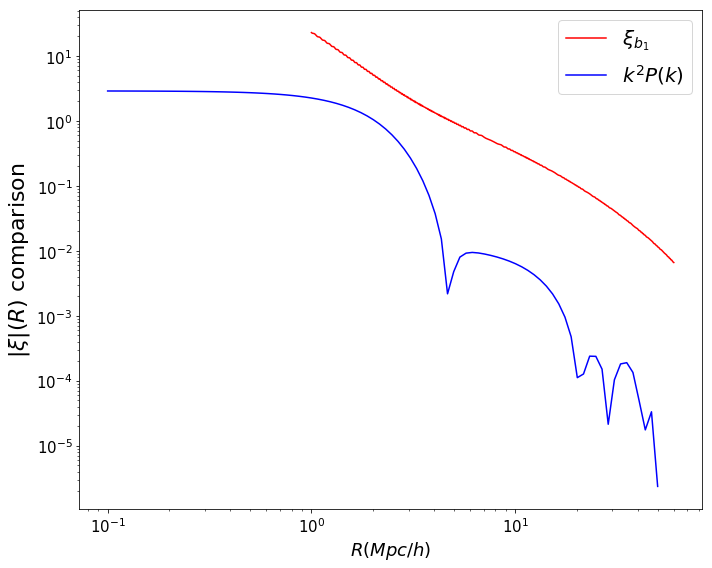

In [5]:
fig, ax = plt.subplots(1,1, figsize = (10,8))

zind = 0
print('z = ' + str(z1[zind]))
# ax.plot(r1,xi1[zind], color = 'blue', marker='',linestyle='-',label=label1)
# # ax.plot(r2,xi2[zind], color = 'red', marker='',linestyle='-',label=label2)
# ax.plot(r3,xi3[zind], color = 'k', marker='',linestyle='-',label=label3)
ax.plot(r2,np.abs(xi2[zind]), color = 'red', marker='',linestyle='-',label=label2)
ax.plot(r1,np.abs(xi1[zind]), color = 'blue', marker='',linestyle='-',label=label1)
# ax.plot(r3,np.abs(xi3[zind]), color = 'k', marker='',linestyle='-',label=label3)
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_ylim(1.8,2.0)
ax.set_xlabel(r'$R(Mpc/h)$', size = 18)
ax.set_ylabel(r'$|\xi|(R)$ comparison', size = 22)
ax.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.tight_layout()
# plt.savefig('xi_k2Pk_comp.png')


z = 0.0


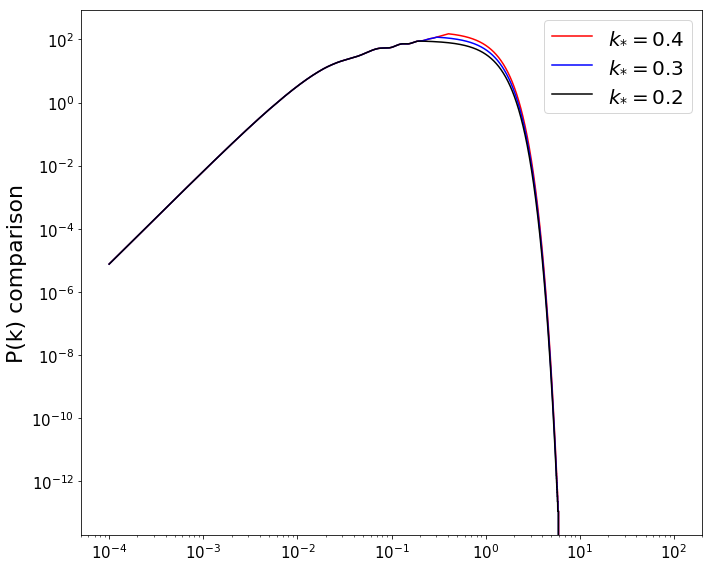

In [68]:
fig, ax = plt.subplots(1,1, figsize = (10,8))

zind = 0
print('z = ' + str(z1[zind]))
ax.plot(k2,Pk2[zind], color = 'red', marker='',linestyle='-',label=label2)
ax.plot(k1,Pk1[zind], color = 'blue', marker='',linestyle='-',label=label1)
ax.plot(k3,Pk3[zind], color = 'k', marker='',linestyle='-',label=label3)
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_ylim(1.8,2.0)
# ax.set_xlabel(r'$\theta$', size = 18)
ax.set_ylabel(r'P(k) comparison', size = 22)
ax.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.tight_layout()




In [81]:
ind_0p3 = np.where((k1 > 0.295) & (k1 < 0.305))[0]



In [82]:
ind_0p3



array([14458, 14459, 14460, 14461, 14462, 14463, 14464, 14465, 14466,
       14467, 14468, 14469, 14470, 14471, 14472, 14473, 14474, 14475,
       14476, 14477, 14478, 14479, 14480, 14481, 14482, 14483, 14484,
       14485, 14486, 14487, 14488, 14489, 14490, 14491, 14492, 14493,
       14494, 14495, 14496, 14497, 14498, 14499, 14500, 14501, 14502,
       14503, 14504, 14505, 14506, 14507, 14508, 14509, 14510, 14511,
       14512, 14513, 14514, 14515, 14516, 14517])

In [83]:
Pk2[zind][ind_0p3]


array([1342.97679455, 1342.20990938, 1341.44495701, 1340.68181558,
       1339.92031082, 1339.16020729, 1338.40119878, 1337.64289815,
       1336.88482662, 1336.12640288, 1335.36693257, 1334.60559802,
       1333.84144868, 1333.07339331, 1332.30019473, 1331.52046767,
       1330.73268071, 1329.93516323, 1329.12611811, 1328.30364096,
       1327.46574634, 1326.61040113, 1325.73556467, 1324.83923511,
       1323.91950031, 1322.97459176, 1322.00293881, 1321.00322076,
       1319.97441366, 1318.91582923, 1317.82714316, 1316.70841105,
       1315.56007073, 1314.38293082, 1313.17814608, 1311.94718128,
       1310.6917658 , 1309.41384161, 1308.1155078 , 1306.79896439,
       1305.46645817, 1304.12023282, 1302.76248482, 1301.39532642,
       1300.02075601, 1298.640623  , 1297.25649586, 1295.86970111,
       1294.4813905 , 1293.09254595, 1291.70398712, 1290.31638148,
       1288.93025602, 1287.54601001, 1286.16392802, 1284.78419288,
       1283.40689826, 1282.03206046, 1280.65962942, 1279.28949

z = 0.0


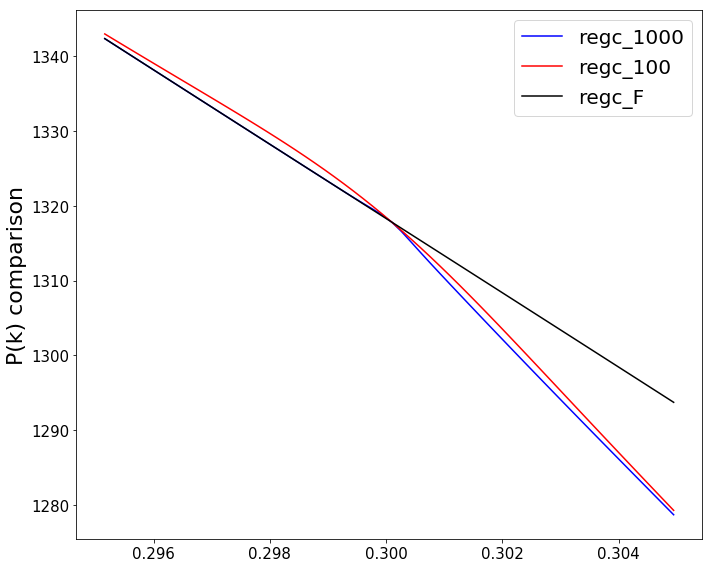

In [84]:
fig, ax = plt.subplots(1,1, figsize = (10,8))

zind = 0
print('z = ' + str(z1[zind]))
ax.plot(k1[ind_0p3],Pk1[zind][ind_0p3], color = 'blue', marker='',linestyle='-',label=label1)
ax.plot(k2[ind_0p3],Pk2[zind][ind_0p3], color = 'red', marker='',linestyle='-',label=label2)
ax.plot(k3[ind_0p3],Pk3[zind][ind_0p3], color = 'k', marker='',linestyle='-',label=label3)
# ax.set_yscale('log')
# ax.set_xscale('log')
# ax.set_ylim(1.8,2.0)
# ax.set_xlabel(r'$\theta$', size = 18)
ax.set_ylabel(r'P(k) comparison', size = 22)
ax.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.tight_layout()





In [86]:
64*4



256

In [18]:


filenames_mm = ['/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/mm_3dcorr_r_0.5_50.0_nr_16_zbin_1_jk_True_njk_180_dsm_1.pk',
    '/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/mm_3dcorr_r_0.5_50.0_nr_16_zbin_5_jk_True_njk_180_dsm_5.pk'
]

bin_val = [1,5]
njk = 180



In [19]:

def get_zmean(zcent,nz_bin):
    prob_zcent = nz_bin
    delz = zcent[1] - zcent[0]
    zmean = (np.sum(prob_zcent*zcent*delz))/(np.sum(prob_zcent*delz))

    return zmean

nz_dir = '/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/'



# filename = nz_dir + 'nz_g_m_' + '_zbin_' + str(5) + '_dsg_' + str(1) + '_dsm_' + str(1)  + '.pk'
# nz_data = pk.load(open(filename, 'rb'))
# nz_m, nz_z = nz_data['nz_m'],nz_data['nz_z']
# zmean_5 = get_zmean(nz_z,nz_m)




z = 0.24489795918367346
z = 0.836734693877551


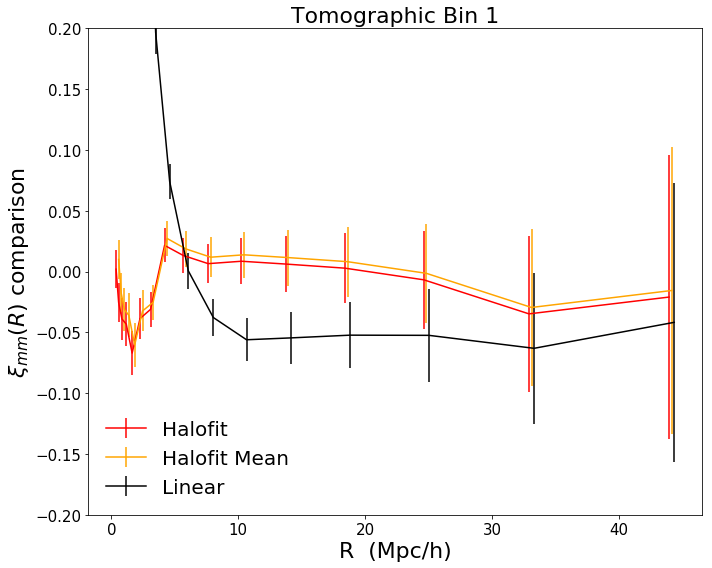

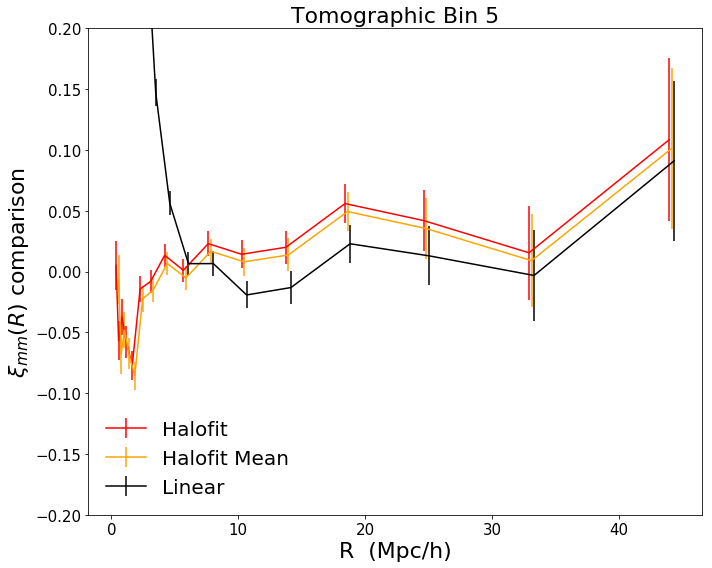

In [41]:
from scipy.interpolate import interp1d
from scipy.interpolate import InterpolatedUnivariateSpline as intspline
import pdb

for j in range(len(filenames_mm)):
    filename_mm = filenames_mm[j]

    mm_data = pk.load(open(filename_mm, "rb"))

    xi_mmtruth = mm_data['xi_mm_full']


    r_mm =  mm_data['r_mm']
    xi_mmtruth_all = mm_data['ximm_big_all']
    xi_mmtruth_mean = np.tile(xi_mmtruth.transpose(),(njk,1))
    xi_mmtruth_sub = xi_mmtruth_all - xi_mmtruth_mean
    xi_mmtruth_sigma = np.sqrt((1.0*(njk-1.)/njk)*(np.sum(np.square(xi_mmtruth_all - xi_mmtruth_mean),axis=0)))

    do_regularize_pk = False

    xi_f_hf = np.load(
        '/global/u1/s/spandey/cosmosis_exp/cosmosis/y3kp-bias-model/3d_stats/test_res/xi_' + Pk_terms_names[1] + '_isregpk_' + str(do_regularize_pk) + '_MICE_cosmo.npz')   

    xi_f_lin = np.load(
        '/global/u1/s/spandey/cosmosis_exp/cosmosis/y3kp-bias-model/3d_stats/test_res/xi_' + Pk_terms_names[0] + '_isregpk_' + str(do_regularize_pk) + '_MICE_cosmo.npz')  


    r_hf,z_hf,xi_hf = xi_f_hf['r'],xi_f_hf['z'],xi_f_hf['xi']
    r_lin,z_lin,xi_lin = xi_f_lin['r'],xi_f_lin['z'],xi_f_lin['xi']
    
    filename = nz_dir + 'nz_g_m_' + '_zbin_' + str(bin_val[j]) + '_dsg_' + str(1) + '_dsm_' + str(1)  + '.pk'
    nz_data = pk.load(open(filename, 'rb'))
    nz_m, nz_z = nz_data['nz_m'],nz_data['nz_z']
    zmean = get_zmean(nz_z,nz_m)
    
    zind = np.where(z_hf > zmean)[0][0]
    print('z = ' + str(z_hf[zind]))

    
    fig, ax = plt.subplots(1,1, figsize = (10,8))
    
    xi_hf_mean = np.zeros(len(r_hf))
    
    for k in range(len(r_hf)):
        xi_hf_temp = intspline(z_hf, xi_hf[:, k])
        xi_hf_mean[k] = (sp.integrate.simps(xi_hf_temp(nz_z) * nz_m * nz_m, nz_z))/(sp.integrate.simps(nz_m*nz_m, nz_z))

#     pdb.set_trace()
    
    
    xi_hf_interp = interp1d(r_hf,xi_hf[zind])
    xi_hf_mean_interp = interp1d(r_hf,xi_hf_mean)
    xi_lin_interp = interp1d(r_lin,xi_lin[zind])
    
#     ax.plot(r_mm, xi_hf_interp(r_mm),color = 'red', marker='',linestyle='-',label='Halofit')
#     ax.plot(r_mm, xi_lin_interp(r_mm), color = 'k', marker='',linestyle='-',label='Linear')
#     ax.errorbar(r_mm,xi_mmtruth,xi_mmtruth_sigma, color = 'blue', marker='*',linestyle='',label=r'Simulation')
#     ax.set_yscale('log')
#     ax.set_xscale('log')

    ax.errorbar(r_mm -0.2, (xi_mmtruth - xi_hf_interp(r_mm))/xi_hf_interp(r_mm),xi_mmtruth_sigma/xi_hf_interp(r_mm),color = 'red', marker='',linestyle='-',label='Halofit')
    ax.errorbar(r_mm, (xi_mmtruth - xi_hf_mean_interp(r_mm))/xi_hf_mean_interp(r_mm),xi_mmtruth_sigma/xi_hf_mean_interp(r_mm),color = 'orange', marker='',linestyle='-',label='Halofit Mean')
    ax.errorbar(r_mm + 0.2, (xi_mmtruth - xi_lin_interp(r_mm))/xi_lin_interp(r_mm),xi_mmtruth_sigma/xi_lin_interp(r_mm), color = 'k', marker='',linestyle='-',label='Linear')
    ax.set_ylim(-0.2,0.2)

    
    
    ax.set_ylabel(r'$\xi_{mm}(R)$ comparison', size = 22)
    ax.set_xlabel(r'R  (Mpc/h)', size = 22)
    ax.legend(fontsize=20,frameon=False,loc='lower left')
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.tick_params(axis='both', which='minor', labelsize=15)
    plt.title('Tomographic Bin ' + str(bin_val[j]), size = 22)
    plt.tight_layout()


    

    






In [252]:


Pk_terms_names = ['Plin', 'Pmm', 'Pd1d2', 'Pd2d2', 'Pd1s2', 'Pd2s2', 'Ps2s2', 'Pd1d3nl', 'k2Pk']

settings1 = {'j1':8,'do_regularize_pk':True,'do_reg_all':False,'reg_k':0.3,'reg_c':1000.0}

Pk_f = np.load('/global/u1/s/spandey/cosmosis_exp/cosmosis/y3kp-bias-model/3d_stats/test_res/Pk_' + 'Pmm' + '_isregpk_' + str(False)  + '_MICE_cosmo.npz')     
k_in  = (Pk_f['k'])
Pk_mm_z = (Pk_f['pkz'])
Pk_in = Pk_mm_z[0,:]
k_mm = np.logspace(np.min(np.log10(k_in)),np.max(np.log10(k_in)),10000)
Pk_mm_interp = interpolate.interp1d(k_in, Pk_in)
Pk_mm = Pk_mm_interp(k_mm)



Pk_f = np.load('/global/u1/s/spandey/cosmosis_exp/cosmosis/y3kp-bias-model/3d_stats/test_res/Pk_' + 'Plin' + '_isregpk_' + str(False)  + '_MICE_cosmo.npz')     
k_in  = (Pk_f['k'])
Pk_in_z = (Pk_f['pkz'])
Pk_in = Pk_in_z[0,:]
k_lin = np.logspace(np.min(np.log10(k_in)),np.max(np.log10(k_in)),10000)
Pk_in_interp = interpolate.interp1d(k_in, Pk_in)
Pk_lin = Pk_in_interp(k_lin)





In [253]:
def Pk2corr(r, k_array, Pk_array):
    toint = (k_array ** 2) * Pk_array * (np.sin(k_array * r)) / (k_array * r)
    valf = (1 / (2 * np.pi ** 2)) * sp.integrate.simps(toint, k_array)
    return valf


def reg_Pk_gaussian(Pk_mat1, k_array, tk, c_val=1.):
    nz_p, nk_p = Pk_mat1.shape
    Pk_mat2 = np.tile(np.exp(- (k_array ** 2 )), (nz_p, 1))
    ind_tk = np.where(k_array > tk)[0][0]
    Pk1_val = Pk_mat1[:, ind_tk]
    Pk2_val = Pk_mat2[:, ind_tk]
    Pk2_scale = (np.tile(Pk1_val / Pk2_val, (nk_p, 1))).T
    Pk_mat2_scaled = np.multiply(Pk_mat2, Pk2_scale)
    tanh_arg_mat = np.tile(c_val * (np.log(k_array) - np.log(k_array[ind_tk])), (nz_p, 1))
    tanh_func = np.tanh(tanh_arg_mat)
    Pk_mat_smooth = Pk_mat1 + np.multiply((1. + tanh_func) / 2., (Pk_mat2_scaled - Pk_mat1))
    return Pk_mat_smooth


def reg_Pk(Pk_mat1, Pk_mat2, k_array, tk, c_val=1.):
    nz_p, nk_p = Pk_mat1.shape
    ind_tk = np.where(k_array > tk)[0][0]
    Pk1_val = Pk_mat1[:, ind_tk]
    Pk2_val = Pk_mat2[:, ind_tk]
    Pk2_scale = (np.tile(Pk1_val / Pk2_val, (nk_p, 1))).T
    Pk_mat2_scaled = np.multiply(Pk_mat2, Pk2_scale)
    tanh_arg_mat = np.tile(c_val * (np.log(k_array) - np.log(k_array[ind_tk])), (nz_p, 1))
    tanh_func = np.tanh(tanh_arg_mat)
    Pk_mat_smooth = Pk_mat1 + np.multiply((1. + tanh_func) / 2., (Pk_mat2_scaled - Pk_mat1))
    return Pk_mat_smooth




In [254]:
# sys.path.insert(0, os.environ['COSMOSIS_SRC_DIR'] + '/cosmosis-des-library/tcp/fast_pt/')
# import FASTPT_2_1.FASTPT as FASTPT
# from FASTPT_2_1.P_extend import k_extend





In [255]:
import copy

k2Pk_mm = (k_mm**2) * Pk_mm

k2Pk_mm_reg_0p3 = reg_Pk_gaussian(np.array([(k_mm**2) * Pk_mm]), k_mm, 0.3, c_val=10.)[0]

k2Pk_mm_reg2_0p3 = reg_Pk(np.array([(k_mm**2) * Pk_mm]),np.array([Pk_lin]), k_lin, 0.3, c_val=10.)[0]

# k2Pk_mm_reg_0p03 = reg_Pk_gaussian(np.array([(k_mm**2) * Pk_mm]), k_mm, 0.03, c_val=1000.)[0]

# k2Pk_mm_reg2_0p03 = reg_Pk(np.array([(k_mm**2) * Pk_mm]),np.array([Pk_lin]), k_lin, 0.03, c_val=100.)[0]

# k2Pk_mm_reg_0p003 = reg_Pk_gaussian(np.array([(k_mm**2) * Pk_mm]), k_mm, 0.003, c_val=1000.)[0]

# k2Pk_mm_reg2_0p003 = reg_Pk(np.array([(k_mm**2) * Pk_mm]),np.array([Pk_lin]), k_lin, 0.003, c_val=100.)[0]

# k2Pk_mm_reg_0p03 = reg_Pk_gaussian(np.array([(k_mm**2) * Pk_mm]), k_mm, 0.03, c_val=100.)[0]

k2Pk_mm_reg_1 = reg_Pk_gaussian(np.array([(k_mm**2) * Pk_mm]), k_mm, 1.0, c_val=10.)[0]

# Pk_mm_reg_1 = reg_Pk_gaussian(np.array([Pk_mm]), k_mm, 1.0, c_val=100.)[0]

# k2Pk_mm_reg_10 = reg_Pk_gaussian(np.array([(k_mm**2) * Pk_mm]), k_mm, 10, c_val=10000.)[0]

# Pk_mm_reg_0p3 = reg_Pk_gaussian(np.array([(k_mm**2) * Pk_mm]), k_mm, 0.3, c_val=10.)[0]

# ind_0p3 = np.where(k_mm > 0.3)[0]
# k2Pk_mm_null_0p3 = copy.deepcopy(k2Pk_mm)
# k2Pk_mm_null_0p3[ind_0p3] = 0.0



# ind_1 = np.where(k_mm > 1.0)[0]
# Pk_mm_null_1 = copy.deepcopy(Pk_mm)
# Pk_mm_null_1[ind_1] = 0.0



ValueError: x and y must have same first dimension, but have shapes (10000,) and (8014,)

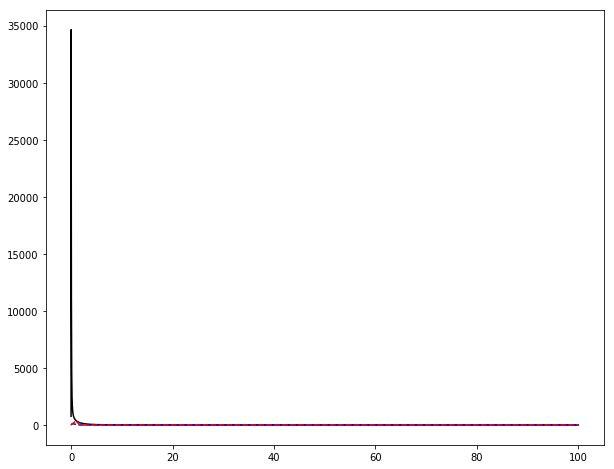

In [364]:


fig, ax = plt.subplots(1,1, figsize = (10,8))

ax.plot(k_mm,Pk_mm, color = 'k', marker='',linestyle='-',label=r'$P_{mm}$')
ax.plot(k_mm,k2Pk_mm_reg_0p3, color = 'b', marker='',linestyle='--',label=r'$k^2 \ P_{mm} \ [k_{\ast}=0.3]$ with Gaussian')
ax.plot(k_mm,k2Pk_mm_reg_1, color = 'r', marker='',linestyle='--',label=r'$k^2 \ P_{mm} \ [k_{\ast}=1.0]$ with Gaussian')
ax.plot(k_mm,k2Pk_mm_reg2_0p3, color = 'orange', marker='',linestyle='--',label=r'$k^2 \ P_{mm} \ [k_{\ast}=0.3] \ {\rm with} \ P_{lin}$ ')



# ax.plot(k_mm,Pk_mm_null_1, color = 'orange', marker='',linestyle='-',label=r'$P_{mm}$')

# ax.plot(k_mm,k2Pk_mm, color = 'b', marker='',linestyle='-',label=r'$k^2 \ P_{mm}$')

# ax.plot(k_mm,k2Pk_mm_reg_0p03, color = 'b', marker='',linestyle='--',label=r'$k^2 \ P_{mm} \ [k_{\ast}=0.03]$')

# ax.plot(k_mm,k2Pk_mm_null_0p3, color = 'r', marker='',linestyle='--',label=r'$k^2 \ P_{mm} \ [k_{\ast}=0.3]$')

# ax.plot(k_mm,k2Pk_mm_reg_1, color = 'b', marker='',linestyle='-.',label=r'$k^2 \ P_{mm} \ [k_{\ast}=1.0]$')

# ax.plot(k_mm,k2Pk_mm_reg_10, color = 'b', marker='',linestyle=':',label=r'$k^2 \ P_{mm} \ [k_{\ast}=10.0]$')


ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim(0,20)ax.set_xlim(0,20)
# ax.set_xlim(9.95,10.05)
# ax.set_ylim(1e-5,50)
ax.set_xlabel(r'$k \ (h/Mpc)$', size = 18)
ax.set_ylabel(r'$P(k)$ comparison', size = 22)
ax.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.tight_layout()
plt.savefig('k2Pk_mm_comp.png')








In [259]:

from mcfit import SphericalBessel as sph
import sys,os
sys.path.insert(0,'/global/u1/s/spandey/FFTLog-and-beyond/python/')
# import fftlog
from fftlog import *


In [261]:
# ind_nz = np.where(k2Pk_mm_reg_0p3 > 1e-7)[0]

# renorm = np.sqrt(np.pi / 2.)
# rtemp, xi_k2Pk_mm_reg_0p3 = \
#         sph(k_mm[ind_nz], nu=0, q=0.5)((k2Pk_mm_reg_0p3[ind_nz]) * renorm, extrap=True)


# xi_k2Pk_mm_reg_0p3 = (1 / (2 * np.pi ** 2)) * xi_k2Pk_mm_reg_0p3

myfftlog = fftlog(k_mm, (k_mm**3)*k2Pk_mm_reg_0p3, nu=2.1, c_window_width=0.15, N_pad=5000)
rtemp, xi_k2Pk_mm_reg_0p3 = myfftlog.fftlog(0)




(5000, 20000, 5000)


In [262]:
xi_k2Pk_mm_reg_0p3



array([ 5.73264826e+01,  5.73264786e+01,  5.73264746e+01, ...,
       -3.64739811e-14, -4.86755891e-14, -3.50796010e-14])

In [363]:
ind_nz = np.where(k2Pk_mm_reg2_0p3 > 1e-3)[0]
myfftlog = fftlog(k_mm[ind_nz], (k_mm[ind_nz]**3)*k2Pk_mm_reg2_0p3[ind_nz], nu=1.0, c_window_width=0.25)
rtemp1, xi_k2Pk_mm_reg2_0p3 = myfftlog.fftlog(0)







(0, 8014, 0)


In [360]:
ind_nz = np.where(k2Pk_mm_reg2_0p3 > 1e-3)[0]
myfftlog = fftlog(k_mm[ind_nz], (k_mm[ind_nz]**3)*k2Pk_mm_reg_1[ind_nz], nu=1.0, c_window_width=0.25)
rtemp1, xi_k2Pk_mm_reg_1 = myfftlog.fftlog(0)




(0, 8014, 0)


In [361]:
xi_k2Pk_mm_reg_1


array([3.65990275e+02, 3.65990005e+02, 3.65989734e+02, ...,
       5.68315642e-03, 5.68315228e-03, 5.68314814e-03])

In [269]:
myfftlog = fftlog(k_mm, (k_mm**3)*Pk_mm, nu=1.5,c_window_width=0.2)
r_mm, xi_mm = myfftlog.fftlog(0)





(0, 10000, 0)


In [270]:
# r_array = np.logspace(0,2,300)
# xi_k2Pk_reg2_0p3_wb = np.zeros(len(r_array))

# for j in range(len(r_array)):
#     xi_k2Pk_reg2_0p3_wb[j] = Pk2corr(r_array[j], k_mm, k2Pk_mm_reg2_0p3)

    

In [271]:
len(rtemp1)


10000

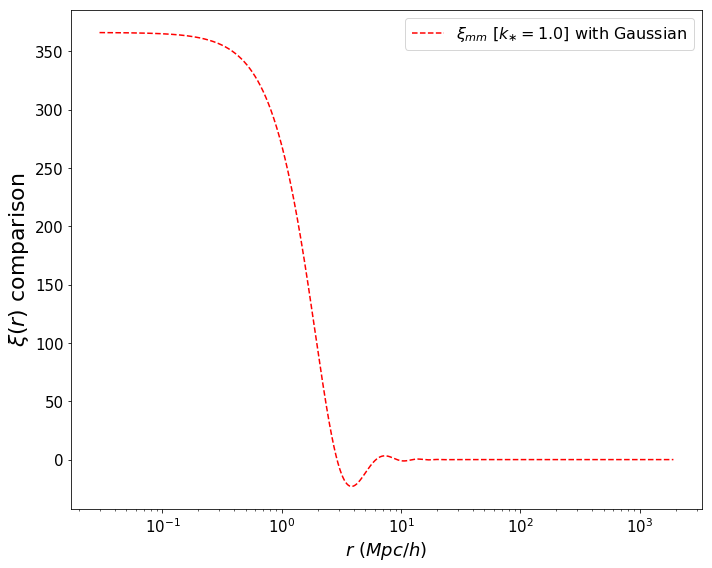

In [362]:


fig, ax = plt.subplots(1,1, figsize = (10,8))

# ax.plot(r_mm,xi_mm, color = 'k', marker='',linestyle='-',label=r'$\xi_{mm}$')


# ax.plot(rtemp, xi_sph, color = 'orange', marker='',linestyle='--',label=r'$P_{mm} \ [k_{\ast}=0.3]$')

# ax.plot(rtemp, xi_k2Pk_mm_reg_0p3 , color = 'b', marker='',linestyle='--',label=r'$\xi_{mm} \ [k_{\ast}=0.3]$ with Gaussian')
# ax.plot(r_cen2, d2xidr2_mm , color = 'r', marker='',linestyle=':',label=r'$\nabla^2 \xi_{nl}$')
ax.plot(rtemp1, xi_k2Pk_mm_reg_1 , color = 'r', marker='',linestyle='--',label=r'$\xi_{mm} \ [k_{\ast}=1.0]$ with Gaussian')
# ax.plot(rtemp2, xi_k2Pk_mm_reg2_0p3 , color = 'orange', marker='',linestyle='--',label=r'$\xi_{mm} \ [k_{\ast}=0.3] \ {\rm with} \ P_{lin}$')
# ax.plot(r_array, xi_k2Pk_reg2_0p3_wb , color = 'magenta', marker='',linestyle=':',label=r'$\xi_{mm} \ [k_{\ast}=0.3] \ {\rm with} \ P_{lin}$ and Bessel')

# ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim(0.1,100)
# ax.set_ylim(1e-6,2e4)
ax.set_xlabel(r'$r \ (Mpc/h)$', size = 18)
ax.set_ylabel(r'$\xi(r)$ comparison', size = 22)
ax.legend(fontsize=16, loc='upper right')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.tight_layout()
# plt.savefig('xi_k2Pk_mm_comp.png')








In [18]:
dr = r_mm[1:] - r_mm[:-1]
dxidr_mm = (xi_mm[1:] - xi_mm[:-1])/dr

r_cen = (r_mm[1:] + r_mm[:-1])/2.

dr = r_cen[1:] - r_cen[:-1]
d2xidr2_mm = (dxidr_mm[1:] - dxidr_mm[:-1])/dr

r_cen2 = (r_cen[1:] + r_cen[:-1])/2.



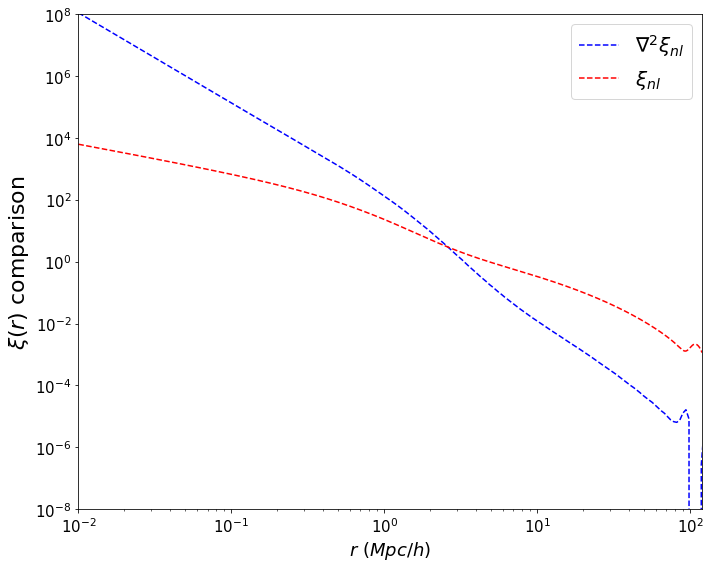

In [54]:
fig, ax = plt.subplots(1,1, figsize = (10,8))

ax.plot(r_cen2, d2xidr2_mm , color = 'b', marker='',linestyle='--',label=r'$\nabla^2 \xi_{nl}$')
# ax.plot(r_cen, -1.*dxidr_mm , color = 'k', marker='',linestyle='--',label=r'$P_{mm} \ [k_{\ast}=0.3]$')
ax.plot(r_mm, xi_mm , color = 'r', marker='',linestyle='--',label=r'$\xi_{nl}$')


ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1e-2,120)
ax.set_ylim(1e-8,1e8)
# ax.set_xlim(0,20)
# ax.set_ylim(1e-5,50)
ax.set_xlabel(r'$r \ (Mpc/h)$', size = 18)
ax.set_ylabel(r'$\xi(r)$ comparison', size = 22)
ax.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.tight_layout()
plt.savefig('xi_derv_comp.png')





In [124]:




k_test = np.logspace(-5,3,10000)

ytest1 = k_test**6
ytest2 = k_test**-7

y_test = reg_Pk(np.array([ytest1]), np.array([ytest2]), k_test, 1., c_val=100.)[0]

ind_nz = np.where(y_test > 1e-9)[0]
k_test,y_test = k_test[ind_nz],y_test[ind_nz]

ell = 1
nu = 1.
myfftlog = fftlog(k_test, y_test, nu=nu, N_extrap_low=1500, N_extrap_high=1500, c_window_width=0.25, N_pad=5000)
r, Fr = myfftlog.fftlog(ell)




(6499, 16434, 6500)


In [125]:
Fr


array([ 1.17592628e-02,  1.17808813e-02,  1.18025393e-02, ...,
       -5.70580041e-05, -5.54899473e-05, -5.31857031e-05])

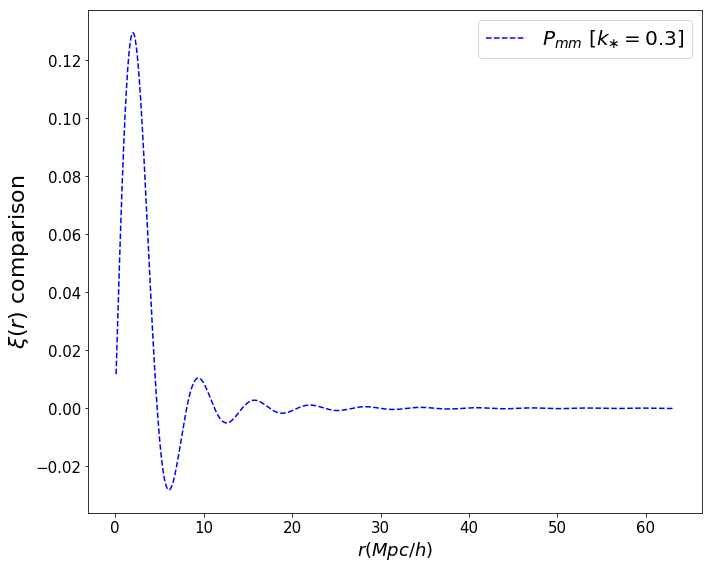

In [126]:

fig, ax = plt.subplots(1,1, figsize = (10,8))

ax.plot(r, Fr , color = 'b', marker='',linestyle='--',label=r'$P_{mm} \ [k_{\ast}=0.3]$')


# ax.set_yscale('log')
# ax.set_xscale('log')

ax.set_xlabel(r'$r(Mpc/h)$', size = 18)
ax.set_ylabel(r'$\xi(r)$ comparison', size = 22)
ax.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.tight_layout()
# plt.savefig('xi_k2Pk_mm_comp.png')








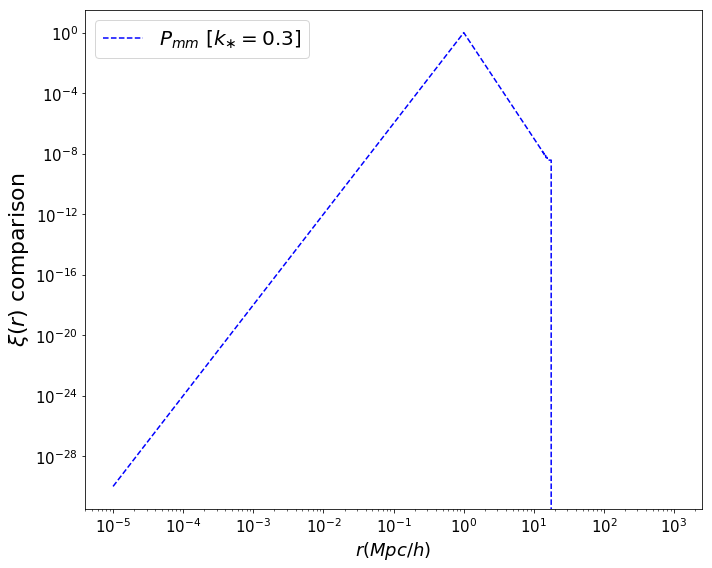

In [119]:
fig, ax = plt.subplots(1,1, figsize = (10,8))

ax.plot(k_test, y_test , color = 'b', marker='',linestyle='--',label=r'$P_{mm} \ [k_{\ast}=0.3]$')


ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim(0.1,5)
ax.set_xlabel(r'$r(Mpc/h)$', size = 18)
ax.set_ylabel(r'$\xi(r)$ comparison', size = 22)
ax.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.tight_layout()
# plt.savefig('xi_k2Pk_mm_comp.png')






In [247]:
# renorm = np.sqrt(np.pi / 2.)
# rtemp, xitemp = \
#         sph(k_mm, nu=0, q=1.5)(Pk_mm * renorm, extrap=True)

# xi_sph = (1 / (2 * np.pi ** 2)) * xitemp


In [245]:
# renorm = np.sqrt(np.pi / 2.)
# rtemp, xitemp_null = \
#         sph(k_mm, nu=0, q=1.5)((Pk_mm_reg_1 + 1e-30) * renorm, extrap=True)

# xi_sph_null = (1 / (2 * np.pi ** 2)) * xitemp_null



In [246]:
# ind_nz = np.where(k2Pk_mm_reg_0p3 > 1e-7)[0]

# renorm = np.sqrt(np.pi / 2.)
# rtemp, xi_k2Pk_mm_reg_0p3 = \
#         sph(k_mm[ind_nz], nu=0, q=0.5)((k2Pk_mm_reg_0p3[ind_nz]) * renorm, extrap=True)


# xi_k2Pk_mm_reg_0p3 = (1 / (2 * np.pi ** 2)) * xi_k2Pk_mm_reg_0p3





In [240]:
# ind_nz = np.where(k2Pk_mm_reg_10 > 0.1)[0]

# renorm = np.sqrt(np.pi / 2.)
# rtemp, xi_k2Pk_mm_reg_10 = \
#         sph(k_mm[ind_nz], nu=0, q=1.5)((k2Pk_mm_reg_10[ind_nz]) * renorm, extrap=True)


# xi_k2Pk_mm_reg_10 = (1 / (2 * np.pi ** 2)) * xi_k2Pk_mm_reg_10






In [241]:
# ind_nz = np.where(k2Pk_mm_reg_1 > 0.1)[0]

# renorm = np.sqrt(np.pi / 2.)
# rtemp, xi_k2Pk_mm_reg_1 = \
#         sph(k_mm[ind_nz], nu=0, q=2.9)((k2Pk_mm_reg_1[ind_nz]) * renorm, extrap=True)


# xi_k2Pk_mm_reg_1 = (1 / (2 * np.pi ** 2)) * xi_k2Pk_mm_reg_1



In [242]:
xi_k2Pk_mm_reg_1



array([ 1.91344201e+01,  1.92099286e+01,  1.90276688e+01,  1.90629189e+01,
        1.88937373e+01,  1.88927900e+01,  1.87288693e+01,  1.86940933e+01,
        1.85284185e+01,  1.84607352e+01,  1.82868011e+01,  1.81858732e+01,
        1.79974537e+01,  1.78618368e+01,  1.76528114e+01,  1.74800869e+01,
        1.72443256e+01,  1.70312353e+01,  1.67625492e+01,  1.65051545e+01,
        1.61973252e+01,  1.58912180e+01,  1.55381264e+01,  1.51787224e+01,
        1.47746020e+01,  1.43575509e+01,  1.38973975e+01,  1.34191463e+01,
        1.28993107e+01,  1.23578490e+01,  1.17768355e+01,  1.11726360e+01,
        1.05320996e+01,  9.86923138e+00,  9.17512235e+00,  8.46245227e+00,
        7.72618212e+00,  6.97849078e+00,  6.21788642e+00,  5.45660677e+00,
        4.69629975e+00,  3.94946865e+00,  3.22026346e+00,  2.52120801e+00,
        1.85796180e+00,  1.24231230e+00,  6.80037384e-01,  1.80971125e-01,
       -2.50665566e-01, -6.08430688e-01, -8.91291487e-01, -1.09741119e+00,
       -1.23002403e+00, -

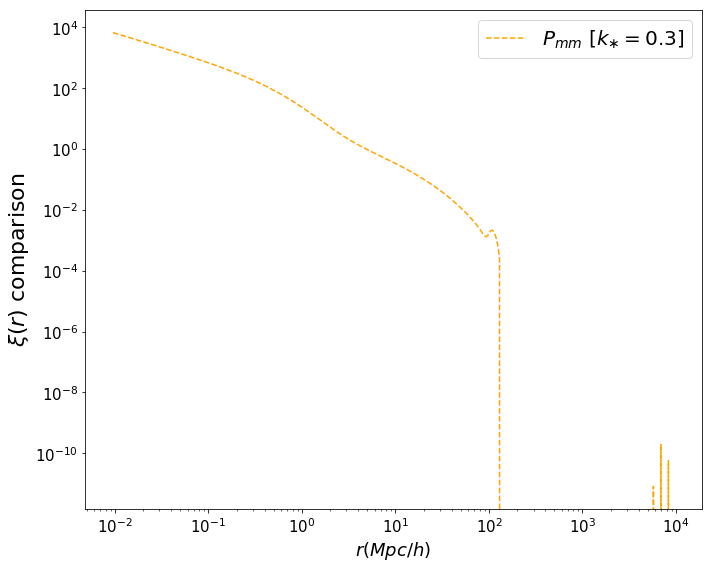

In [249]:


fig, ax = plt.subplots(1,1, figsize = (10,8))

# ax.plot(r_array,xi_mm, color = 'k', marker='',linestyle='-',label=r'$P_{mm}$')


ax.plot(rtemp, xi_sph, color = 'orange', marker='',linestyle='--',label=r'$P_{mm} \ [k_{\ast}=0.3]$')

# ax.plot(rtemp, xi_k2Pk_mm_reg_10, color = 'b', marker='',linestyle='--',label=r'$P_{mm} \ [k_{\ast}=0.3]$')


ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim(0,20)
# ax.set_ylim(1e-5,50)
ax.set_xlabel(r'$r(Mpc/h)$', size = 18)
ax.set_ylabel(r'$\xi(r)$ comparison', size = 22)
ax.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.tight_layout()
# plt.savefig('xi_k2Pk_mm_comp.png')







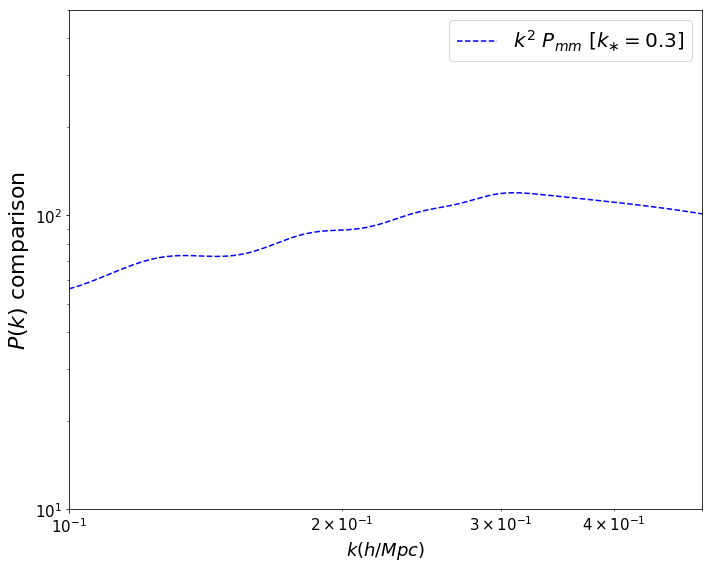

In [80]:


fig, ax = plt.subplots(1,1, figsize = (10,8))

ax.plot(k_mm,k2Pk_mm_reg_0p3, color = 'b', marker='',linestyle='--',label=r'$k^2 \ P_{mm} \ [k_{\ast}=0.3]$')


ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(0.1,0.5)
ax.set_ylim(10,500)
ax.set_xlabel(r'$k(h/Mpc)$', size = 18)
ax.set_ylabel(r'$P(k)$ comparison', size = 22)
ax.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.tight_layout()
# plt.savefig('xi_k2Pk_mm_comp.png')









In [101]:
r_array = np.logspace(0,1.8,500)
xi_mm = np.zeros(len(r_array))
xi_k2Pk = np.zeros(len(r_array))
xi_k2Pk_reg_0p3 = np.zeros(len(r_array))
xi_Pk_null_1 = np.zeros(len(r_array))
xi_k2Pk_mm_null_0p3  = np.zeros(len(r_array))
xi_k2Pk_reg_1 = np.zeros(len(r_array))
xi_k2Pk_reg_10 = np.zeros(len(r_array))

for j in range(len(r_array)):
    xi_mm[j] = Pk2corr(r_array[j], k_mm, Pk_mm)
    xi_k2Pk[j] = Pk2corr(r_array[j], k_mm, k2Pk_mm)
    xi_k2Pk_reg_0p3[j] = Pk2corr(r_array[j], k_mm, k2Pk_mm_reg_0p3)
    xi_Pk_null_1[j] = Pk2corr(r_array[j], k_mm, Pk_mm_null_1)
    xi_k2Pk_mm_null_0p3[j] = Pk2corr(r_array[j], k_mm, k2Pk_mm_null_0p3)
    xi_k2Pk_reg_1[j] = Pk2corr(r_array[j], k_mm, k2Pk_mm_reg_1)
    xi_k2Pk_reg_10[j] = Pk2corr(r_array[j], k_mm, k2Pk_mm_reg_10)

    


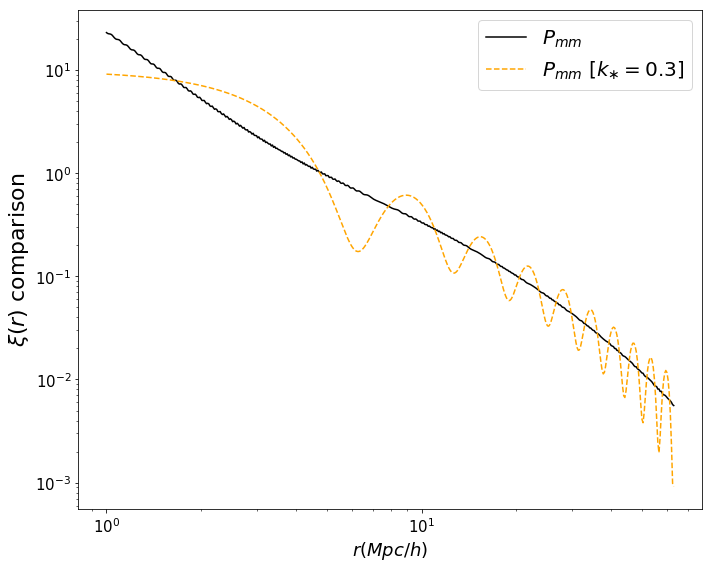

In [102]:


fig, ax = plt.subplots(1,1, figsize = (10,8))

ax.plot(r_array,xi_mm, color = 'k', marker='',linestyle='-',label=r'$P_{mm}$')

# ax.plot(r_array,xi_k2Pk, color = 'b', marker='',linestyle='-',label=r'$k^2 \ P_{mm}$')

ax.plot(r_array,xi_Pk_null_1, color = 'orange', marker='',linestyle='--',label=r'$P_{mm} \ [k_{\ast}=0.3]$')

# ax.plot(r_array,xi_k2Pk_reg_0p3, color = 'b', marker='',linestyle='--',label=r'$k^2 \ P_{mm} \ [k_{\ast}=0.3]$')

# ax.plot(r_array,xi_k2Pk_mm_null_0p3, color = 'r', marker='',linestyle='--',label=r'$k^2 \ P_{mm} \ [k_{\ast}=0.3]$')

# ax.plot(r_array,xi_k2Pk_reg_1, color = 'b', marker='',linestyle='-.',label=r'$k^2 \ P_{mm} \ [k_{\ast}=1.0]$')

# ax.plot(r_array,xi_k2Pk_reg_10, color = 'b', marker='',linestyle=':',label=r'$k^2 \ P_{mm} \ [k_{\ast}=10.0]$')


ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_ylim(1e-5,50)
ax.set_xlabel(r'$r(Mpc/h)$', size = 18)
ax.set_ylabel(r'$\xi(r)$ comparison', size = 22)
ax.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.tight_layout()
# plt.savefig('xi_k2Pk_mm_comp.png')


